## Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def retantion_rate_count(file_path_reg, file_path_auth):
    
    # Считываем данные 
    reg = pd.read_csv(file_path_reg, sep = ';')  
    auth = pd.read_csv(file_path_auth, sep = ';')
    
    # Изменяем тип данных
    reg['reg_ts'] = pd.to_datetime(reg['reg_ts'], unit = 's')
    auth['auth_ts'] = pd.to_datetime(auth['auth_ts'], unit = 's')
    
    # Объединяем два датафрейма
    df = auth.merge(reg, on='uid').reset_index()
    
    # Меняем местами колонки для удобства
    df = df[['uid', 'reg_ts', 'auth_ts']]    
    
    # Переименовываем колонки    
    df = df.rename(columns={'uid' : 'user_id', 'reg_ts' : 'install_day', 'auth_ts' : 'event_day'})
    
    # Убираем время из даты 
    df['install_day'] = df['install_day'].dt.strftime('%Y-%m-%d')   
    df['event_day'] = df['event_day'].dt.strftime('%Y-%m-%d')
    
    # Возвращаем необходимый тип данных 
    df['install_day'] = pd.to_datetime(df['install_day'])           
    df['event_day'] = pd.to_datetime(df['event_day'])    
        
    # Выбираем диапазон для расчета метрики с 1 по 24 августа, когда есть полные данные за 30 дней
    df = df.query('"2020-08-01" <= install_day and install_day <= "2020-08-24"') 
    
    # Создаем колонку кол-вом дней между install_day и event_day
    df['days_diff'] = (df.event_day - df.install_day).dt.days
    
    # Выбираем диапазон для расчета метрики c 1 по 30 день
    df = df.query('days_diff < 31')
    
    # Создаем сводную таблицу
    cohort = df.groupby(['install_day', 'days_diff']).user_id.nunique().reset_index() 
    
    # Разворачиваем таблицу для подсчета retention
    retention_base = cohort.pivot(index='install_day', columns='days_diff', values='user_id')
    
    # Таблица с кол-вом инсталлов по дням
    installs = retention_base[0]
    
    # Итоговый результат
    retention = retention_base.divide(installs, axis=0).round(3)
    
    return retention * 100

In [3]:
# Данные лежат в папке shared
file_path_reg = 'problem1-reg_data.csv' # данные о времени регистрации
file_path_auth = 'problem1-auth_data.csv' # данные о времени захода пользователей в игру

In [4]:
retantion_rate_count(file_path_reg, file_path_auth)

/var/folders/0p/7ctpjh8n3p75_35_c1b49wr80000gn/T/ipykernel_7793/3743301501.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_diff'] = (df.event_day - df.install_day).dt.days


days_diff,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
install_day,,,,,,,,,,,,,,,,,,,,,
2020-08-01,100.0,1.9,4.4,4.3,5.6,5.9,7.6,6.4,4.5,6.4,...,3.4,4.0,3.8,4.2,4.1,2.5,3.1,3.2,3.1,2.7
2020-08-02,100.0,2.6,4.0,4.4,5.2,6.5,6.6,6.0,4.5,5.3,...,4.6,3.8,3.9,4.0,3.2,3.4,3.0,3.4,3.3,2.7
2020-08-03,100.0,1.7,4.3,4.0,5.6,6.2,7.5,5.3,5.0,4.9,...,4.1,4.4,3.0,3.9,3.2,4.4,3.4,3.2,2.6,2.2
2020-08-04,100.0,2.0,3.6,4.7,5.2,5.3,6.5,5.2,4.4,4.7,...,4.0,3.0,4.4,2.9,3.2,3.0,3.2,2.6,2.7,2.2
2020-08-05,100.0,2.6,3.5,4.0,5.7,5.1,7.8,6.1,4.2,4.7,...,3.4,3.3,3.3,3.8,3.0,3.6,2.8,3.0,3.1,2.8
2020-08-06,100.0,1.7,5.1,5.7,5.6,5.7,7.5,6.1,5.0,5.8,...,3.8,3.9,3.4,3.8,3.1,2.9,4.1,3.2,2.8,2.9
2020-08-07,100.0,2.2,3.1,5.3,5.3,6.0,7.2,6.2,5.1,5.0,...,4.7,3.1,3.8,3.9,3.5,3.9,2.4,3.9,3.0,3.5
2020-08-08,100.0,2.4,4.8,4.2,5.4,5.4,7.2,6.3,3.9,4.8,...,3.5,4.3,3.3,4.0,3.5,2.6,2.8,3.1,2.8,2.2
2020-08-09,100.0,2.1,3.9,4.6,5.4,7.1,6.3,6.6,4.5,4.9,...,3.9,4.1,3.7,4.3,3.1,3.5,3.5,2.9,3.7,2.6


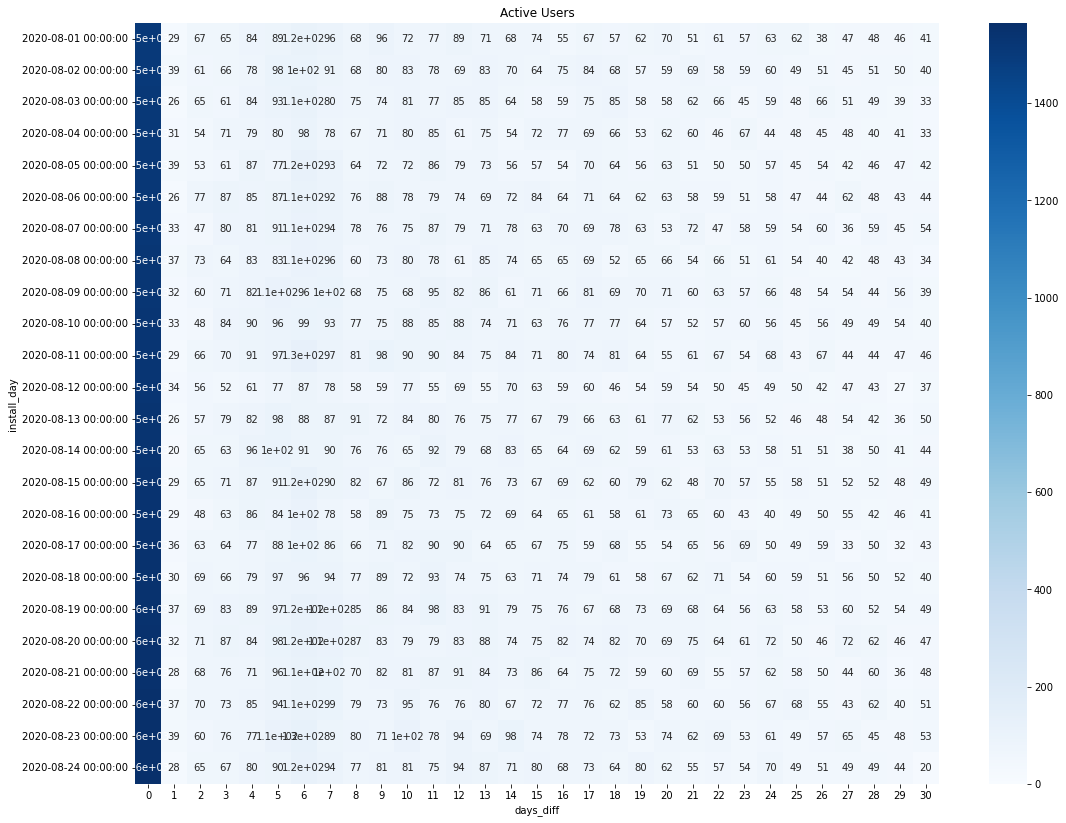

In [7]:
# Визуализируем результат
# В абсолютных значениях
plt.figure(figsize=(18,14))
plt.title('Active Users')
ax = sns.heatmap(data=retention_base, annot=True, vmin=0.0,cmap='Blues')
ax.set_yticklabels(retention_base.index)
fig=ax.get_figure()

plt.show()

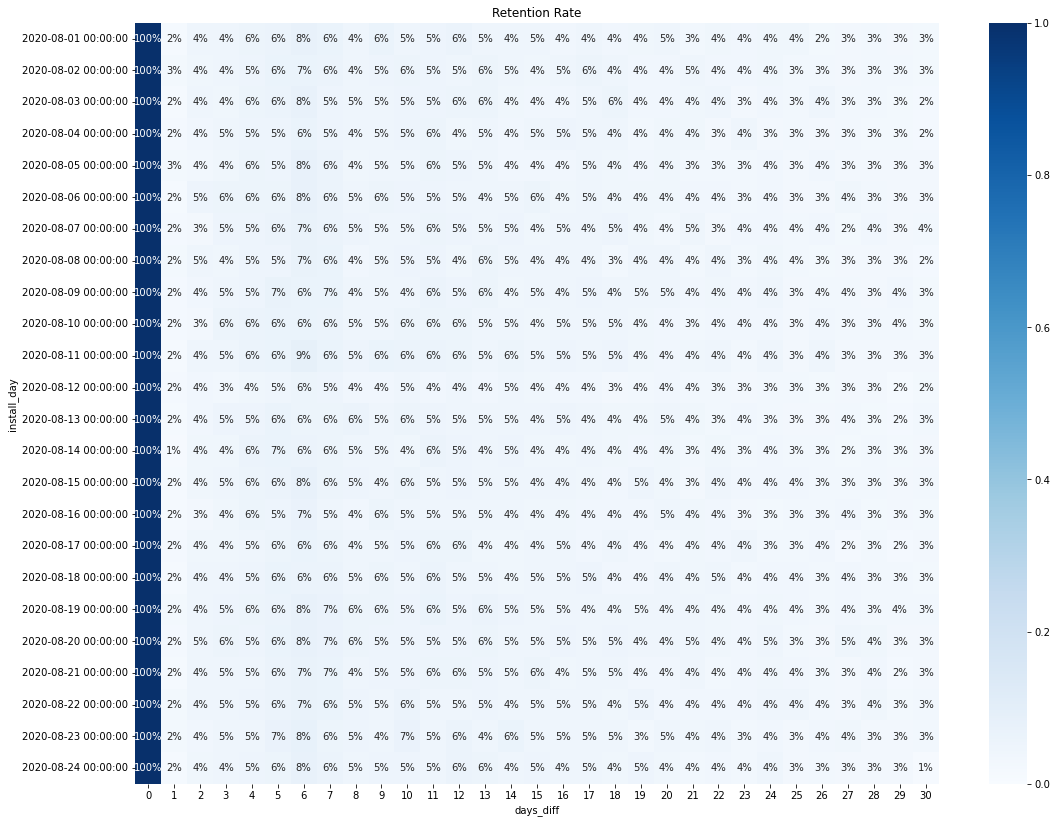

In [8]:
# В процентах
plt.figure(figsize=(18,14))
plt.title('Retention Rate')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Blues')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()

plt.show()

In [6]:
# Отдельно для построения графиков

# Считываем данные 
reg = pd.read_csv(file_path_reg, sep = ';')  
auth = pd.read_csv(file_path_auth, sep = ';')
    
    # Изменяем тип данных
reg['reg_ts'] = pd.to_datetime(reg['reg_ts'], unit = 's')
auth['auth_ts'] = pd.to_datetime(auth['auth_ts'], unit = 's')
    
    # Объединяем два датафрейма
df = auth.merge(reg, on='uid').reset_index()
    
    # Меняем местами колонки для удобства
df = df[['uid', 'reg_ts', 'auth_ts']]    
    
    # Переименовываем колонки    
df = df.rename(columns={'uid' : 'user_id', 'reg_ts' : 'install_day', 'auth_ts' : 'event_day'})
    
    # Убираем время из даты 
df['install_day'] = df['install_day'].dt.strftime('%m/%d/%Y')   
df['event_day'] = df['event_day'].dt.strftime('%m/%d/%Y')
    
    # Возвращаем необходимый тип данных 
df['install_day'] = pd.to_datetime(df['install_day'])           
df['event_day'] = pd.to_datetime(df['event_day'])    
        
    # Выбираем диапазон для расчета метрики с 1 по 24 августа, когда есть полные данные за 30 дней
df = df.query('"2020-08-01" <= install_day and install_day <= "2020-08-24"') 
    
    # Создаем колонку кол-вом дней между install_day и event_day
df['days_diff'] = (df.event_day - df.install_day).dt.days
    
    # Выбираем диапазон для расчета метрики c 1 по 30 день
df = df.query('days_diff < 31')
    
    # Создаем сводную таблицу
cohort = df.groupby(['install_day', 'days_diff']).user_id.nunique().reset_index() 
    
    # Разворачиваем таблицу для подсчета retention
retention_base = cohort.pivot(index='install_day', columns='days_diff', values='user_id')
    
    # Таблица с кол-вом инсталлов по дням
installs = retention_base[0]
    
    # Итоговый результат
retention = retention_base.divide(installs, axis=0).round(3)